### Downloading and Exploring Data

In [1]:
from pathlib import Path
from IPython.core.debugger import set_trace
from fastai import datasets
import pickle, gzip, math, torch, matplotlib as mpl
import matplotlib.pyplot as plt
from torch import tensor

MNIST_URL='http://deeplearning.net/data/mnist/mnist.pkl'

In [2]:
path = datasets.download_data(MNIST_URL, ext='.gz'); path

PosixPath('/Users/jeff/.fastai/data/mnist.pkl.gz')

In [3]:
with gzip.open(path, 'rb') as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')

In [4]:
x_train,y_train,x_valid,y_valid = map(tensor, (x_train,y_train,x_valid,y_valid))
n,c = x_train.shape
x_train, x_train.shape, y_train, y_train.shape, y_train.min(), y_train.max()

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 torch.Size([50000, 784]),
 tensor([5, 0, 4,  ..., 8, 4, 8]),
 torch.Size([50000]),
 tensor(0),
 tensor(9))

In [5]:
mpl.rcParams['image.cmap'] = 'gray'

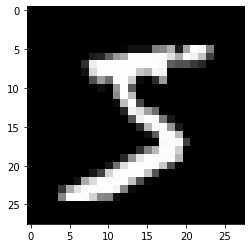

In [6]:
img = x_train[0]
plt.imshow(img.view((28,28)));

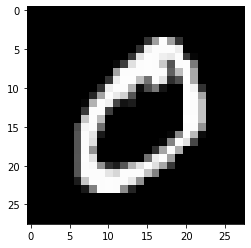

In [7]:
img = x_train[1]
plt.imshow(img.view((28,28)));

### Building a Layer

In [20]:
weights = torch.randn(784,10)
bias = torch.zeros(10)

X = x_valid[:5]
W = weights
X = X.numpy()
W = W.numpy()

X.shape # (5, 784), 5 observations
W.shape # (784, 10), 10 outputs

(784, 10)

In [22]:
prod = X@W
prod.shape

(5, 10)

### Training the matrix

In [23]:
def normalize(x, m, s): return (x-m)/s

In [25]:
train_mean,train_std = x_train.mean(),x_train.std()
x_train = normalize(x_train, train_mean, train_std)
x_valid = normalize(x_valid, train_mean, train_std)

In [26]:
n,m = x_train.shape
c = y_train.max()+1
n,m,c

(50000, 784, tensor(10))

In [28]:
nh = 50

In [29]:
w1 = torch.randn(m,nh)/math.sqrt(m)
b1 = torch.zeros(nh)
w2 = torch.randn(nh,1)/math.sqrt(nh)
b2 = torch.zeros(1)

In [30]:
x_valid.mean(),x_valid.std()

(tensor(-0.0057), tensor(0.9924))

In [ ]:
def relu(x): return x.clamp_min(0.)